# Sentiment Analysis with a Neural Network

The following project attempts to predict/allocate classes according to the text (positive or negative) I let process by our self-created neural network.

I will build a Recurrent Neural Network (RNN), specifically a Long Short Term Memory (LSTM). The LSTM approach allows the network to remember and learn from past data, and we can overcome the "vanishing gradient problem"** of RNNs.

The data the model will deal with are comments from an e-commerce company. The comments will be divided into positive and negative comments.

** The vanishing gradient problem occurs when the gradient becomes very small after being backpropagated many times. They become so small that they more or less "vanish".

In [5]:
#downloading the needed libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv(r"C:\Users\gandj\OneDrive\Desktop\Case_Study\Text_Analysis\E_Commerce\Womens Clothing E-Commerce Reviews.csv").iloc[:,1:]
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Data Cleaning

In [7]:
#as we can see the data set contains NaN values
(df.isnull().sum()/len(df))*100

Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

In [8]:
print('Number of missing values for {}: {}'.format(df.columns[3],
        round(len(df)*round((df.isnull().sum()/len(df))[3],4))))

Number of missing values for Review Text: 845


In [9]:
print('Number of missing values for {}: {}'.format(df.columns[2],
        round(len(df)*round((df.isnull().sum()/len(df))[2],4))))

Number of missing values for Title: 3809


In [10]:
#here we see all rows where the text and title column contained NaN values
df[df['Review Text'].isna() | df['Title'].isna()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...
23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses
23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [11]:
#I have made the decision to drop all rows, which do not contain a comment
df=df.dropna(subset=['Review Text'])

#columns "Title" and "Clothing ID" were dropped because they are not needed for the analysis
df.drop(['Title','Clothing ID'],axis=1,inplace=True)
(df.isnull().sum()/len(df))*100

Age                        0.000000
Review Text                0.000000
Rating                     0.000000
Recommended IND            0.000000
Positive Feedback Count    0.000000
Division Name              0.057418
Department Name            0.057418
Class Name                 0.057418
dtype: float64

In [12]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [13]:
#number of comments broken down by age
df.groupby(['Age'])['Review Text'].count().to_frame().rename(
    columns={'Review Text':'Number of Comments'}).sort_values('Number of Comments',ascending=False).head(15)

,Number of Comments
Age,
39,1226
35,851
36,801
34,766
38,751
37,727
41,717
33,699
46,691


Text(0.5, 1.0, 'Breakdown of the Top 15 Age Groups of Female online Consumers')

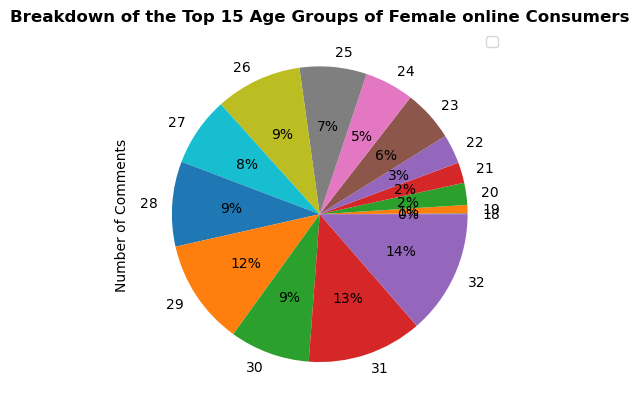

In [14]:
df.groupby(['Age'])['Review Text'].count().to_frame().rename(
    columns={'Review Text':'Number of Comments'}).head(15).plot(kind='pie',subplots=True,autopct='%1.0f%%')
plt.legend('')
plt.title('Breakdown of the Top 15 Age Groups of Female online Consumers', size=12, fontweight='bold')

In [15]:
#number of comments allocated to the age group
numb_rating=df.groupby(['Age'])['Rating'].count().to_frame().sort_values('Rating',
ascending=False).rename(columns={'Rating':'Number of Ratings'}).reset_index()

df=pd.merge(df,numb_rating, how='left', on='Age')

In [16]:
df.head(10)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Number of Ratings
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,699
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,766
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,335
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,385
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,545
5,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,474
6,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1226
7,39,"I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,1226
8,24,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,235
9,34,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,766


In [17]:
#mean rating by users when the age group had at least 50 comments
avg_rat=df[df['Number of Ratings']>=50].groupby(['Age'])['Rating'].mean().to_frame().rename(
    columns={'Rating':'Mean_Rating_of_Consumers'}).sort_values('Mean_Rating_of_Consumers',ascending=False).reset_index()

In [18]:
avg_rat.head(10)

,Age,Mean_Rating_of_Consumers
0,22,4.450000
1,65,4.445455
2,21,4.438776
3,62,4.378378
4,20,4.342857
5,58,4.339416
6,59,4.316456
7,61,4.304545
8,41,4.304045
9,63,4.299145


Text(0.5, 1.0, 'Top 10 Age Groups with the highets average Ratings')

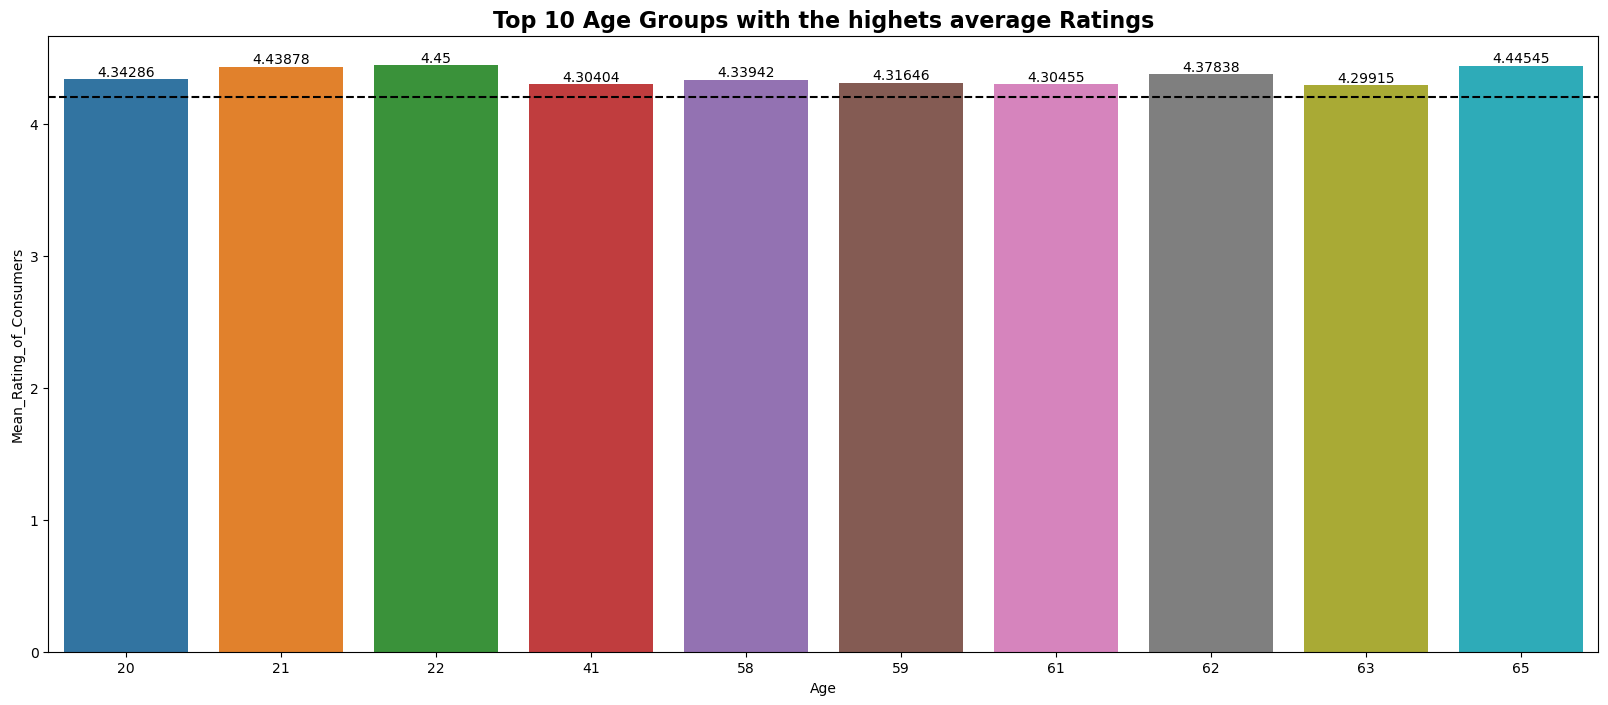

In [19]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x='Age', y='Mean_Rating_of_Consumers', data=avg_rat.head(10))
for i in ax.containers:
    ax.bar_label(i,)
plt.axhline(avg_rat['Mean_Rating_of_Consumers'].mean(),ls='--',color='black')
plt.title('Top 10 Age Groups with the highets average Ratings', size=16, fontweight='bold')

Text(0.5, 1.0, 'Boxplots of different Age & Rating Combinations')

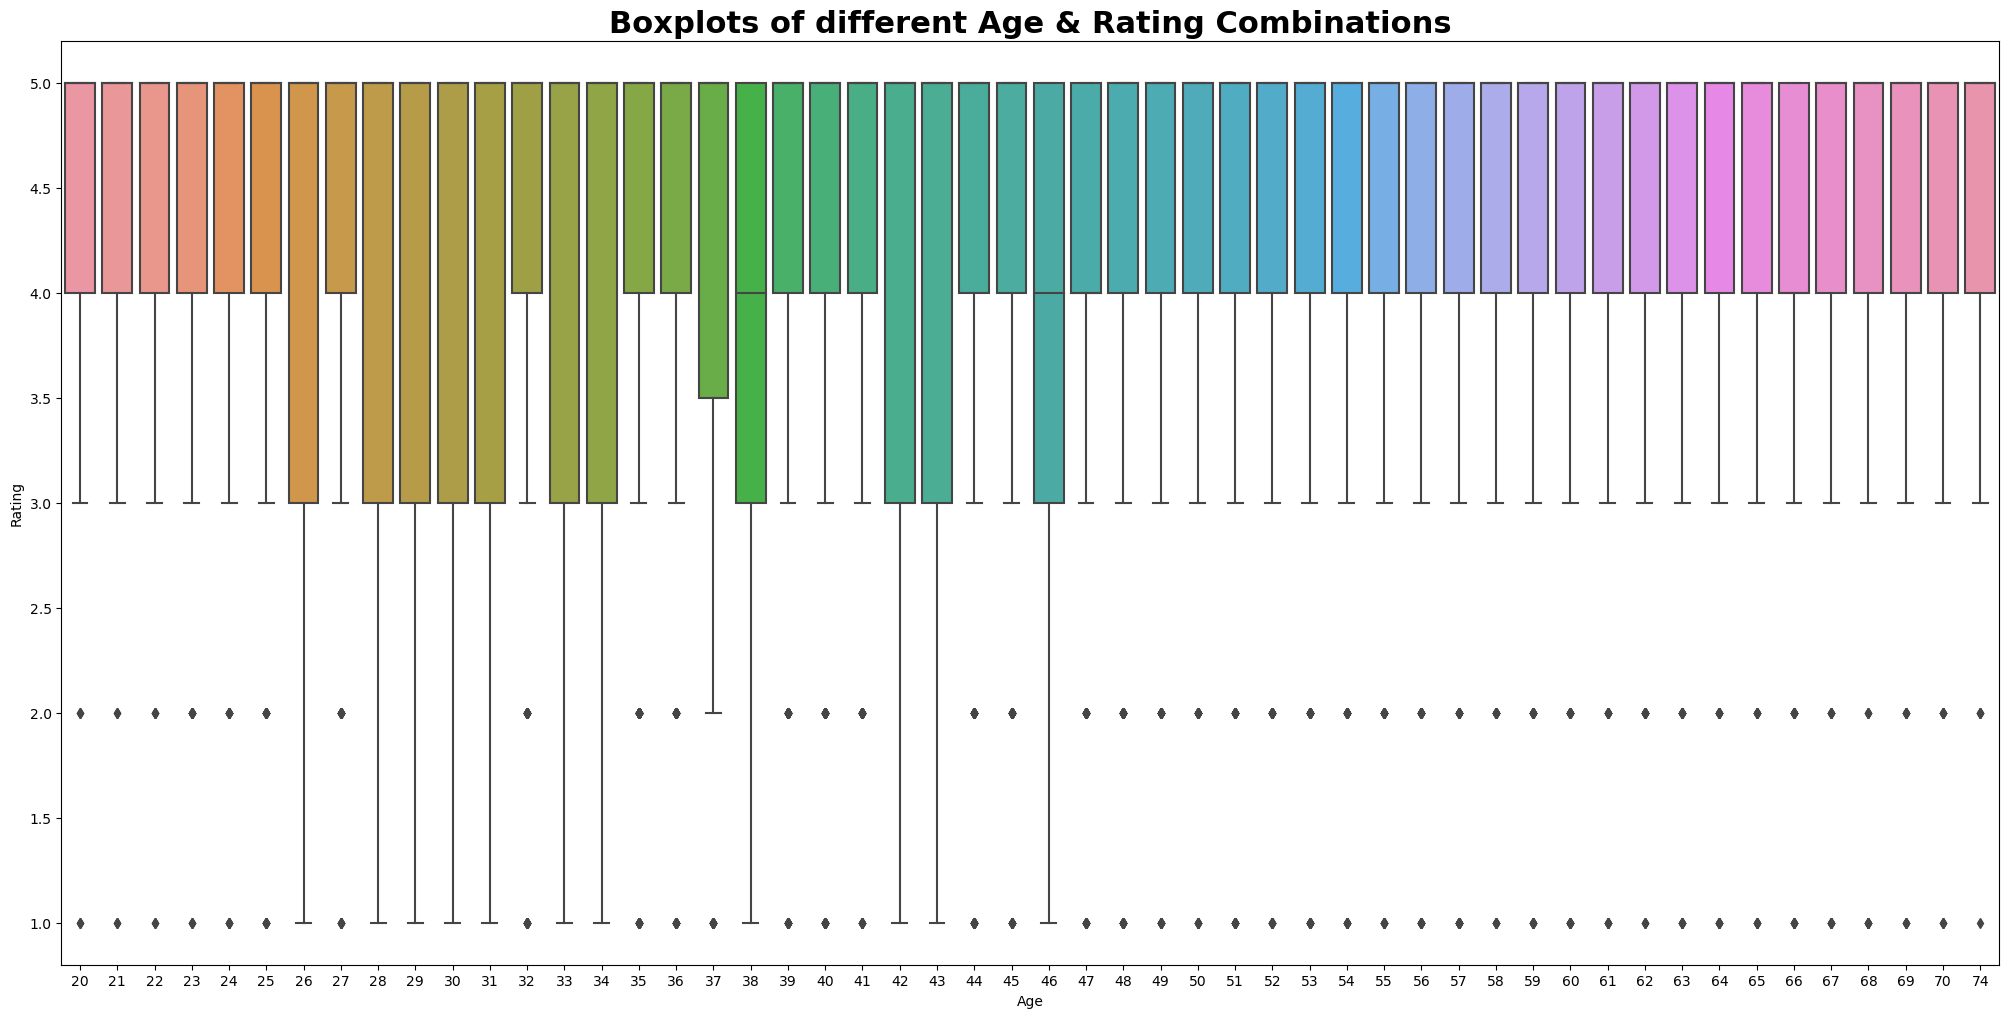

In [20]:
plt.figure(figsize=(25,12))
sns.boxplot(x='Age',y='Rating',data=df[df['Number of Ratings']>=50])
plt.title('Boxplots of different Age & Rating Combinations',size=22,fontweight='bold')

We can see here that consumers in the age groups from 26 to 46 tend to have more fluctuating ratings than all the other age groups.

## Creating Classification for our Model

In [21]:
print('Number of text entries: {}'.format(len(df)))

Number of text entries: 22641


In [22]:
#every text with a rating of three
#we can consider three as a neutral comment, but when we look at the comments, we can see that primarly comments
##with a rating of three are rather negative, therfore we will devide the data set in only positive and negative
##comments
df[df['Rating']==3]['Review Text']

2        I had such high hopes for this dress and reall...
10       Dress runs small esp where the zipper area run...
14       This is a nice choice for holiday gatherings. ...
16       Material and color is nice.  the leg opening i...
23       Cute little dress fits tts. it is a little hig...
                               ...                        
22619    The pattern of this skirt is adorable and look...
22631    Cute dress but not for me.  the waist is too h...
22637    It reminds me of maternity clothes. soft, stre...
22638    This fit well, but the top was very see throug...
22639    I bought this dress for a wedding i have this ...
Name: Review Text, Length: 2823, dtype: object

To perform a sentiment analysis, we need to create categories, in our case we will have following categories:
- Positive
- Negative
These categories 

Next, we will create these categories, to do so we will use the rating column:
- 5-4 => Positive
- 1-3 => Negative

In [23]:
def sentiment(x):
    if x<=5 & x>=4:
        return 'Positive'
    else:
        return 'Negative'

df['Customer_Sentiment']=df['Rating'].apply(lambda x: sentiment(x))
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Number of Ratings,Customer_Sentiment
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,699,Positive
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,766,Positive
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,335,Negative
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,385,Positive
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,545,Positive


In [24]:
df['Overall_Category']=df['Division Name']+'_'+df['Department Name']+'_'+df['Class Name']
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Number of Ratings,Customer_Sentiment,Overall_Category
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,699,Positive,Initmates_Intimate_Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,766,Positive,General_Dresses_Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,335,Negative,General_Dresses_Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,385,Positive,General Petite_Bottoms_Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,545,Positive,General_Tops_Blouses


In [25]:
df_cat=df[df['Number of Ratings']>=50].groupby('Overall_Category')[['Age',
        'Positive Feedback Count']].agg({np.max,np.min,np.mean}).transpose()
df_cat.head(10)

Overall_Category              General Petite_Bottoms_Jeans  \
Age                     amin                     20.000000   
                        amax                     70.000000   
                        mean                     42.751445   
Positive Feedback Count amin                      0.000000   
                        amax                     42.000000   
                        mean                      1.869942   

Overall_Category              General Petite_Bottoms_Pants  \
Age                     amin                     21.000000   
                        amax                     74.000000   
                        mean                     43.860640   
Positive Feedback Count amin                      0.000000   
                        amax                     71.000000   
                        mean                      2.419962   

Overall_Category              General Petite_Bottoms_Skirts  \
Age                     amin                      22.000000   
                        amax                      74.000000   
                        mean                      42.074534   
Positive Feedback Count amin                       0.000000   
                        amax                      42.000000   
                        mean                       2.335404   

Overall_Category              General Petite_Dresses_Dresses  \
Age                     amin                       20.000000   
                        amax                       74.000000   
                        mean                       41.781350   
Positive Feedback Count amin                        0.000000   
                        amax                       94.000000   
                        mean                        3.084405   

Overall_Category              General Petite_Intimate_Lounge  \
Age                     amin                       20.000000   
                        amax                       70.000000   
                        mean                       41.591928   
Positive Feedback Count amin                        0.000000   
                        amax                       55.000000   
                        mean                        2.520179   

Overall_Category              General Petite_Jackets_Jackets  \
Age                     amin                       22.000000   
                        amax                       70.000000   
                        mean                       43.498305   
Positive Feedback Count amin                        0.000000   
                        amax                       26.000000   
                        mean                        2.701695   

Overall_Category              General Petite_Jackets_Outerwear  \
Age                     amin                         20.000000   
                        amax                         74.000000   
                        mean                         46.931507   
Positive Feedback Count amin                          0.000000   
                        amax                         47.000000   
                        mean                          2.986301   

Overall_Category              General Petite_Tops_Blouses  \
Age                     amin                    20.000000   
                        amax                    74.000000   
                        mean                    43.783109   
Positive Feedback Count amin                     0.000000   
                        amax                    78.000000   
                        mean                     3.056622   

Overall_Category              General Petite_Tops_Fine gauge  \
Age                     amin                       20.000000   
                        amax                       74.000000   
                        mean                       44.285714   
Positive Feedback Count amin                        0.000000   
                        amax                       35.000000   
                        mean                        2.186224   

O

Text(0.5, 1.0, 'Max Age broken down by the Sentiment & Categories')

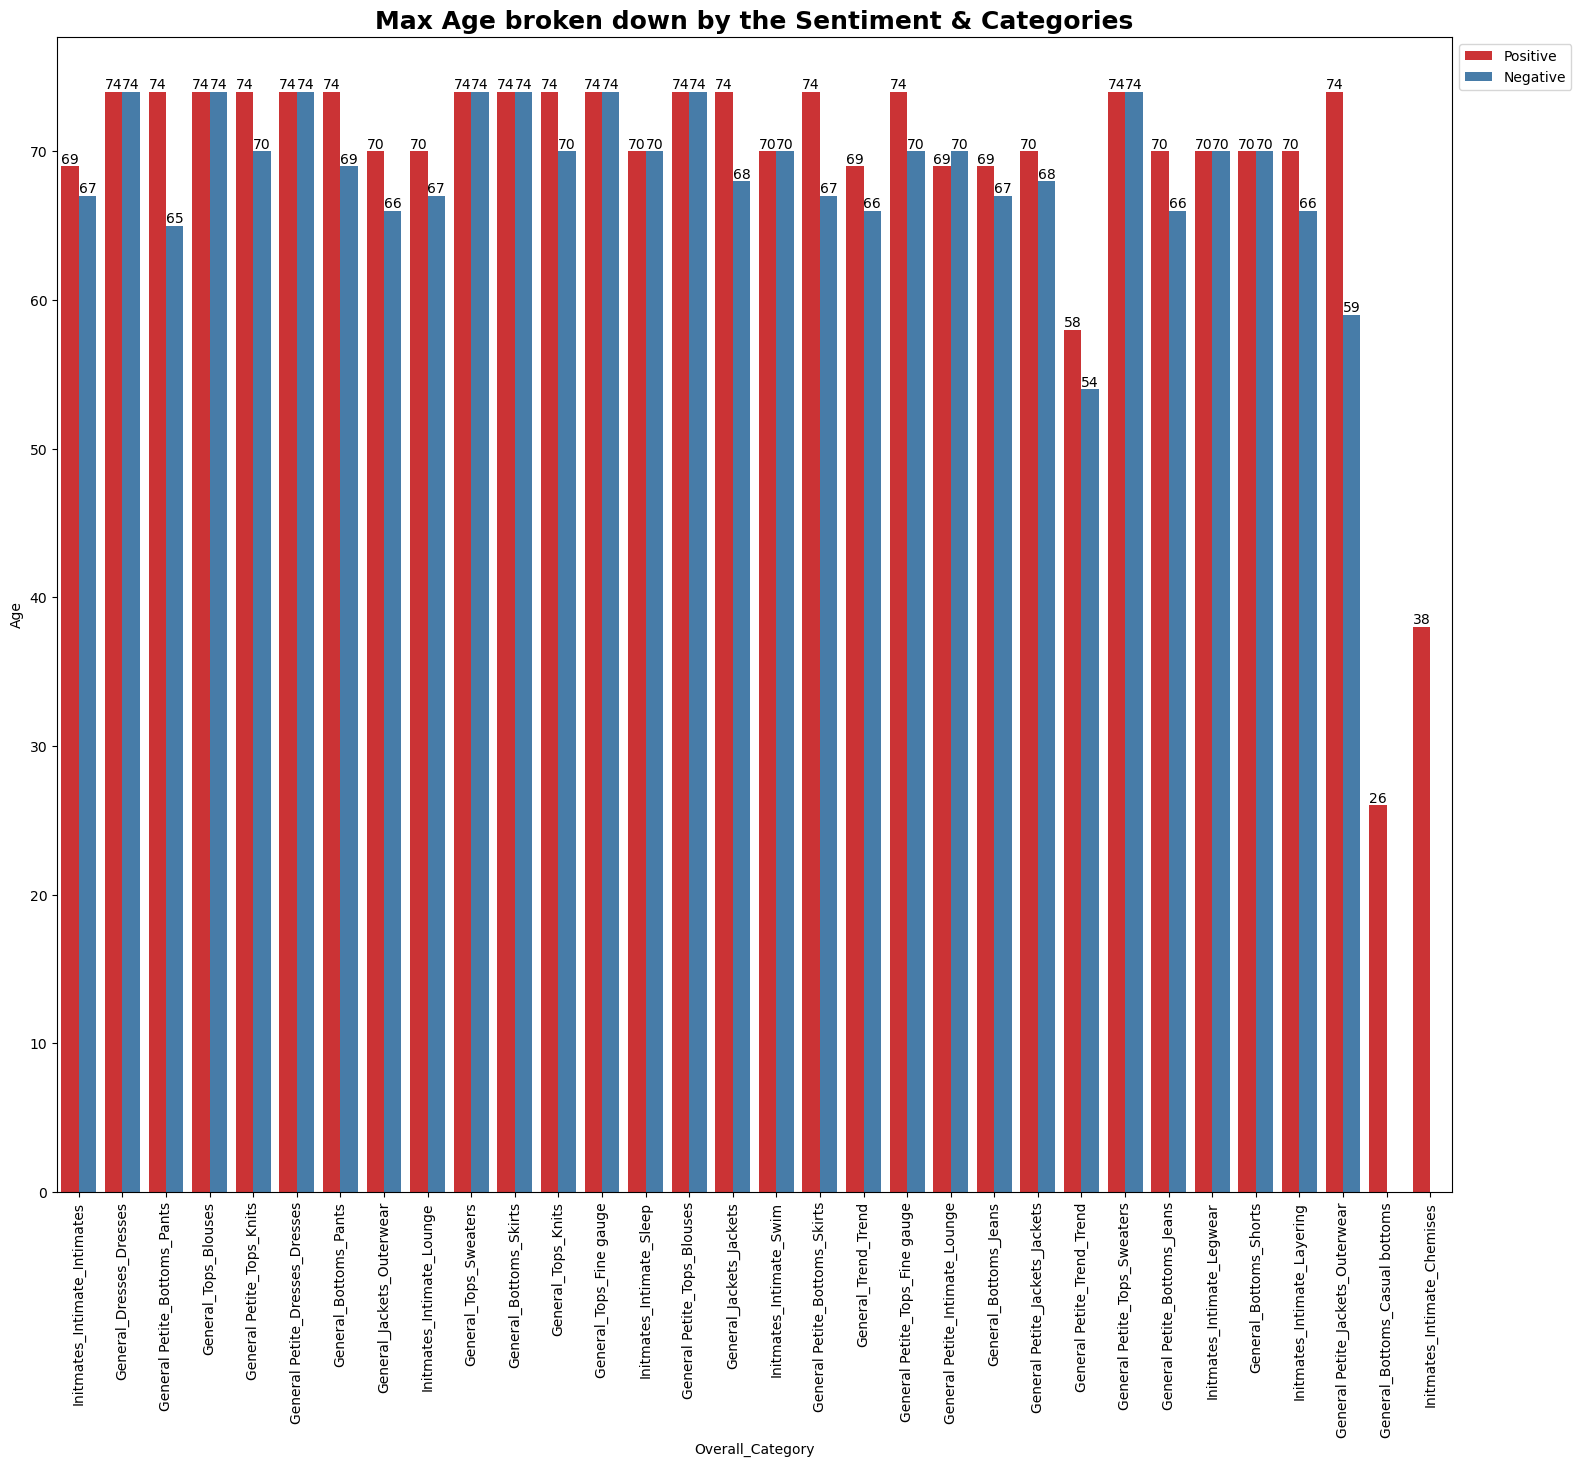

In [26]:
fig,ax=plt.subplots()
fig.set_size_inches(18, 15)
ax=sns.barplot(x='Overall_Category',y='Age',data=df[df['Number of Ratings']>=50],estimator='max',hue='Customer_Sentiment',
              errorbar=('ci', False),palette='Set1')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Max Age broken down by the Sentiment & Categories',size=18,fontweight='bold')

Overall, we do not see a big age difference/gap between the different sentiment and product groups when it comes to the maximum age of the consumer. However, it is worth mentioning that we found two groups that show an age gap between the different sentiment groups.

- General Petite Trend Trend => The max age of postive & negative feedback are in ther 50s, the majority is in their 70s and 60s

- General Petite Jackets Outerwear => we see completely different age groups for the other feedback groups. The max age for positive feedback is 74, but for negative, the max-age is 59

It is also worth mentioning that the product groups "General Bottoms Casual bottoms" & "Initmates Initmates Chemies" only have positive, and the consumer's max-age was for "General Bottoms Casual bottoms" in the 20s and for "Intimates Intimates Chemies" 30s.

Text(0.5, 1.0, 'Median Age broken down by the Sentiment & Categories')

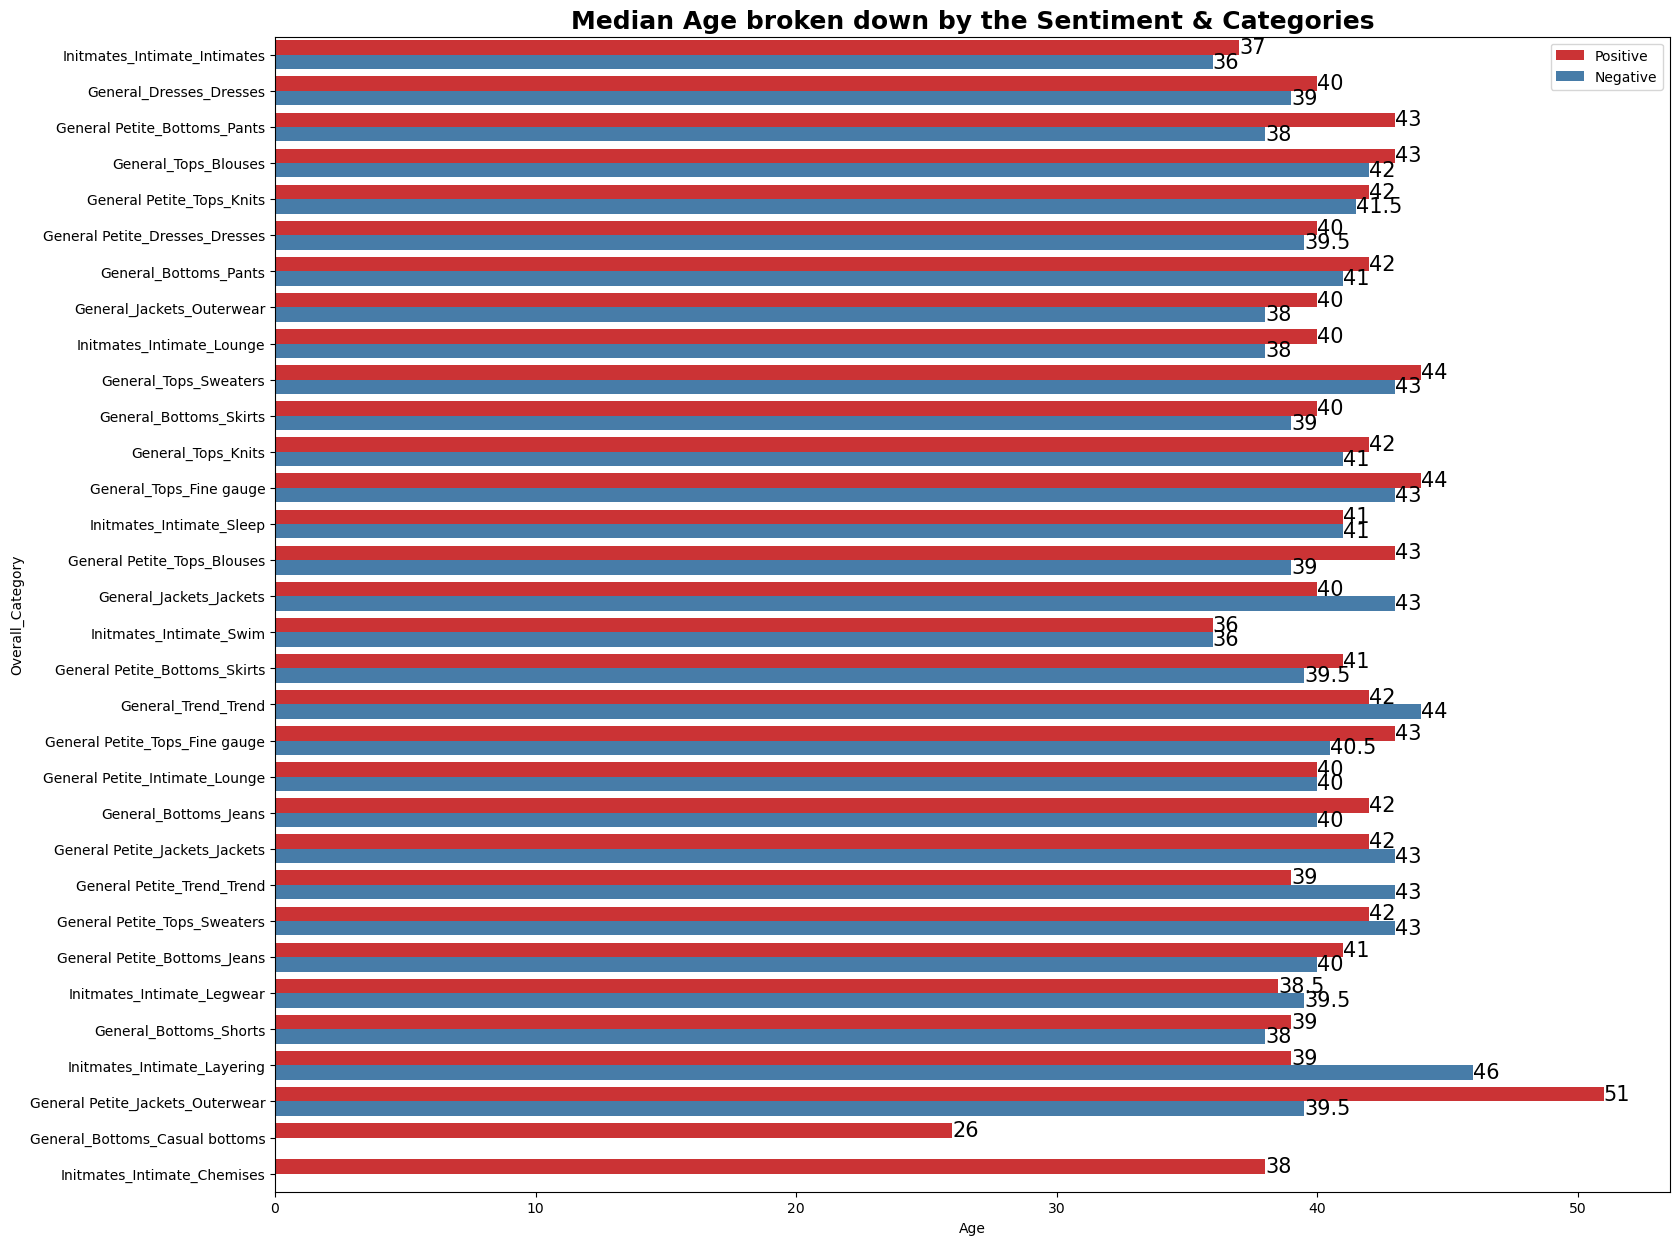

In [27]:
fig,ax=plt.subplots()
fig.set_size_inches(18, 15)
ax=sns.barplot(x='Age',y='Overall_Category',data=df[df['Number of Ratings']>=50],estimator='median',
               hue='Customer_Sentiment',errorbar=('ci', False),palette='Set1')
for i in ax.containers:
    ax.bar_label(i,fontsize=15)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Median Age broken down by the Sentiment & Categories',size=18,fontweight='bold')

Next, we want to get an idea which how many comments belong one of the three sentiment categories.

Text(0.5, 1.0, 'Number of Coments broken down ')

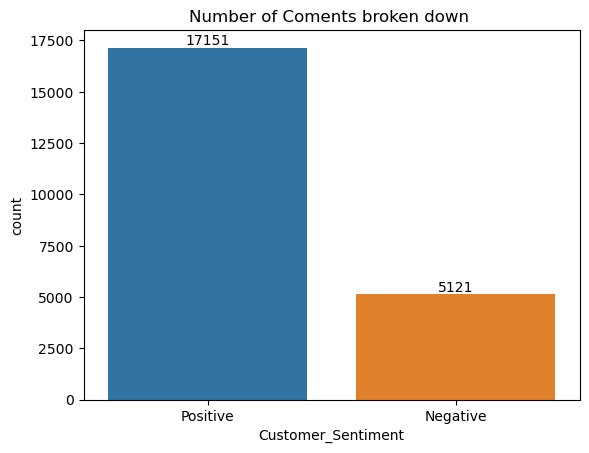

In [28]:
ax=sns.countplot(x='Customer_Sentiment',data=df[df['Number of Ratings']>=50])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of Coments broken down ')

Here we can observe, that the costumers a predominantly postive towards the products. This might seem a little bit unrealistic, but when we are dealing with a popular brand/shop, the number of positive feedbacks are not that unrealistic.

This aspect can be very important, as we can see here, we are dealing with a imbalanced data set, therefore we will use as an evaluation metric macro F1 score.

## Text Analysis

In this porject we will build a Recurrent Neural Network (RNN), specifically a Long Short Term Memory (LSTM).
We will tackle the problem as following:
- Preprocessing the training data=> this involves Normalization, Tokenization, Stopwords Removal, and Stemming/Lemmatization

- Creating the different Layers of the network

### Prepearing the Data
First, we need to split each comment word by word, so that we get each word of each comment singeld out.

In [29]:
#setting up the libraries for tokenizing and sequencing the text data
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gandj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gandj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Here, I have illustrated a test run in which I performed each step separately, from cleaning the data to encoding each word.

In [30]:
test=df['Review Text'][0]
test

'Absolutely wonderful - silky and sexy and comfortable'

In [31]:
token_test=word_tokenize(test)
token_test

['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable']

In [32]:
new_filtered_words=[word for word in token_test if word.lower() not in stopwords.words('english')]
new_filtered_words

['Absolutely', 'wonderful', '-', 'silky', 'sexy', 'comfortable']

In [33]:
new_test=' '.join(new_filtered_words)
new_test

'Absolutely wonderful - silky sexy comfortable'

In [34]:
#here an example of a tokenizer, sequence and removing of stopwords
tokenizer_test = Tokenizer(num_words=500, split=' ')
tokenizer_test.fit_on_texts(new_test)
X=tokenizer_test.texts_to_sequences(new_test)
print('Number of characters: {}'.format(len(X)))
X

Number of characters: 45


[[6],
 [7],
 [4],
 [2],
 [1],
 [8],
 [9],
 [3],
 [1],
 [5],
 [],
 [12],
 [2],
 [13],
 [14],
 [3],
 [10],
 [11],
 [8],
 [1],
 [],
 [],
 [],
 [4],
 [15],
 [1],
 [16],
 [5],
 [],
 [4],
 [3],
 [17],
 [5],
 [],
 [18],
 [2],
 [19],
 [11],
 [2],
 [10],
 [9],
 [6],
 [7],
 [1],
 [3]]

In [35]:
X = pad_sequences(X)
X

array([[ 6],
       [ 7],
       [ 4],
       [ 2],
       [ 1],
       [ 8],
       [ 9],
       [ 3],
       [ 1],
       [ 5],
       [ 0],
       [12],
       [ 2],
       [13],
       [14],
       [ 3],
       [10],
       [11],
       [ 8],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 4],
       [15],
       [ 1],
       [16],
       [ 5],
       [ 0],
       [ 4],
       [ 3],
       [17],
       [ 5],
       [ 0],
       [18],
       [ 2],
       [19],
       [11],
       [ 2],
       [10],
       [ 9],
       [ 6],
       [ 7],
       [ 1],
       [ 3]])

In [36]:
#here is an exmaple of the tokenizer, sequence but without stopwords
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(test)
X=tokenizer.texts_to_sequences(test)
print('Number of characters: {}'.format(len(X)))
X

Number of characters: 53


[[2],
 [9],
 [5],
 [3],
 [1],
 [10],
 [11],
 [4],
 [1],
 [6],
 [],
 [14],
 [3],
 [7],
 [8],
 [4],
 [12],
 [13],
 [10],
 [1],
 [],
 [],
 [],
 [5],
 [15],
 [1],
 [16],
 [6],
 [],
 [2],
 [7],
 [8],
 [],
 [5],
 [4],
 [17],
 [6],
 [],
 [2],
 [7],
 [8],
 [],
 [18],
 [3],
 [19],
 [13],
 [3],
 [12],
 [11],
 [2],
 [9],
 [1],
 [4]]

We can see the tokenizer does not automatically remove the stopwords; the stopwords do not provide any deeper meaning when it comes to a sentiment analysis.

The next move is to create a def function, which will allow us to clean the data. To be more specific, we remove all the stop words.

In [37]:
def data_comment(text):
    text_input=text
    new_text=word_tokenize(text)
    new_filtered_words=[word for word in new_text if word.lower() not in stopwords.words('english')]
    new_clean_text=' '.join(new_filtered_words)
    return new_clean_text

def sentiment_transform(x):
    if x=='Positive':
        return 0
    else:
        return 1

In [38]:
df['new_review']=df['Review Text'].apply(lambda x: data_comment(x))
df['sent_trans']=df['Customer_Sentiment'].apply(lambda x: sentiment_transform(x))
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Number of Ratings,Customer_Sentiment,Overall_Category,new_review,sent_trans
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,699,Positive,Initmates_Intimate_Intimates,Absolutely wonderful - silky sexy comfortable,0
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,766,Positive,General_Dresses_Dresses,Love dress ! 's sooo pretty . happened find st...,0
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,335,Negative,General_Dresses_Dresses,high hopes dress really wanted work . initiall...,1
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,385,Positive,General Petite_Bottoms_Pants,"love , love , love jumpsuit . 's fun , flirty ...",0
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,545,Positive,General_Tops_Blouses,shirt flattering due adjustable front tie . pe...,0


After cleaning the data we can create the train/test sets.

X=> the cleaned review text

y=> the sentiment category (Positive and Negative)

### Train_Test_Split

In [39]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=df['new_review'].values

#we do not need to use the LabelEncoder, because we have trasnformed the string values to numerical values already
y=df['sent_trans'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [40]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

#the tokenizer that we have created can contain 100000 different words; the number was chosen because
##according to the Oxford English Dictionary, there are 170000 different words in current use. Therefore, I have decided to
###use 100000, which will allow us to capture the true sentiment of the customer's review
tokenizer_text=Tokenizer(num_words=100000, split=' ')

data_set_sentences=df['Review Text']
sent_sequ=[]
for sentence in data_set_sentences:
  words=sentence.split(' ')
  sent_sequ.append(len(words))
max_sequ=max(sent_sequ)

#creating the X feature validation data set
valx=int(round(len(X_test)*0.25,0))
X_val=pd.Series(X_test)[:valx].values

#creating the X feature test data set
X_test=pd.Series(X_test)[valx+1:].values

#creating the y feature validation data set
valy=int(round(len(y_test)*0.25,0))
y_val=y_test[:valy]

#creating the y feature test data set
y_test=y_test[valy+1:]

#sequencing & padding for the training data set
##as usual, we fit the model on the training data set
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_train_padded=pad_sequences(X_train)
X_train_padded=tf.cast(X_train_padded, dtype=tf.float32)

#sequencing & padding for the validation data set
X_val=tokenizer.texts_to_sequences(X_val)
X_val_padded=pad_sequences(X_val)
X_val_padded=tf.cast(X_val_padded, dtype=tf.float32)

#sequencing & padding for the test data set
X_test=tokenizer.texts_to_sequences(X_test)
X_test_padded=pad_sequences(X_test)
X_test_padded=tf.cast(X_test_padded, dtype=tf.float32)

#to_categorical allows us to transform class vectors, in form of integers, to binary class matrices
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#to get the number of words that the model was trained on
word_index=len(tokenizer.word_index)
vocab_size=word_index+1

embedd_dim=vocab_size/2
embedd_dim=int(embedd_dim)

In [41]:
#y_train after applying the to_categorical()
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [42]:
#as a logic test
print('X_val: ',len(X_val))
print('X_test: ',len(X_test))
print('y_val: ',len(y_val))
print('y_test: ',len(y_test))
print('\n')
print('X_train: ',len(X_train))
print('y_train: ',len(y_train))
print('DF: ',len(df))

X_val:  1415
X_test:  4245
y_val:  1415
y_test:  4245


X_train:  16980
y_train:  16980
DF:  22641


As already mentioned, the data set is imbalanced. We have a lot more positive comments than negative comments. Our model may struggle with imbalanced data, so I will use under- and oversampling to account for the imbalance.

#### Undersampling
For the undersampling approach, I will use RandomUnderSampler. Here, the algorithm selects a subset of samples of the majority class but leaves the minority class untouched.

#### Oversampling
For oversampling, I will use SMOTE. This method allows us to oversample the minority class to increase the number of the minority class to work against the imbalance in the data set.

In [43]:
from imblearn.under_sampling import RandomUnderSampler

#Setting up the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=101)

#fitting RandomUnderSampler on the data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_padded, y_train)

#changing the dytpe to tf.float32, otherwise the network is not able to process the input
X_train_resampled=tf.cast(X_train_resampled, dtype=tf.float32)

#changing the dytpe to tf.float32, otherwise the network is not able to process the input
y_train_resampled=to_categorical(y_train_resampled)
y_train_resampled=tf.cast(y_train_resampled, dtype=tf.float32)

In [44]:
y_train_resampled

<tf.Tensor: shape=(7816, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

The data is set up for the model now. Next, we will set up the model.

### Setting up the Model
#### Neural Network with basic settings

Before I create a proper model, which includes hyperparameter tuning, I will build a basic model just to showcase the whole process.

In [45]:
#basic model
#model with imbalance data

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
from keras import regularizers

text_model=Sequential()
#our model is able to process the needed amount of unique words in a dense vector size of 64
text_model.add(Embedding(vocab_size,64))

#input layer
text_model.add(Bidirectional(LSTM(128,return_sequences=True)))
#30% will be randomly excluded from each update cycle
text_model.add(Dropout(0.3))
#first hidden layer
##Bidirectional allows to process the input in both directions (forward and backwards)
text_model.add(Bidirectional(LSTM(128)))
text_model.add(Dropout(0.3))
##L1 & L2 regularization are there to add penalty terms to the loss function
text_model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01),
                     activity_regularizer=regularizers.l1(0.01)))
text_model.add(Dropout(0.3))

#output layer
text_model.add(Dense(y_train.shape[1], activation='sigmoid'))
##as optimizer we use Adam optimizer; as metric the macro F1 score
text_model.compile(loss='binary_crossentropy',optimizer=Adam(0.001),metrics=tf.keras.metrics.F1Score(average='macro'),run_eagerly=True)

print(text_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          815104    
                                                                 
 bidirectional (Bidirection  (None, None, 256)         197632    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [63]:
#EarlyStopping allows us to stop two epochs after the max F1 score was reached, so we do not go the full 15 epochs
early_stop=EarlyStopping(monitor='val_f1_score', mode='max', patience=2)

np.random.seed(101)
history=text_model.fit(X_train_padded,y_train,epochs=15, validation_data=(X_val_padded,y_val),
                       batch_size=64,callbacks=early_stop)

Epoch 1/15
266/266 [==============================] - 259s 975ms/step - loss: 0.6303 - f1_score: 0.7353 - val_loss: 0.4012 - val_f1_score: 0.7837
Epoch 2/15
266/266 [==============================] - 289s 1s/step - loss: 0.3802 - f1_score: 0.8034 - val_loss: 0.3873 - val_f1_score: 0.7851
Epoch 3/15
266/266 [==============================] - 273s 1s/step - loss: 0.3607 - f1_score: 0.8105 - val_loss: 0.3651 - val_f1_score: 0.8045
Epoch 4/15
266/266 [==============================] - 278s 1s/step - loss: 0.3464 - f1_score: 0.8233 - val_loss: 0.3561 - val_f1_score: 0.7935
Epoch 5/15
266/266 [==============================] - 263s 989ms/step - loss: 0.3326 - f1_score: 0.8257 - val_loss: 0.3648 - val_f1_score: 0.7869


In [64]:
#dataframe which showcases the loss and val_loss 
model_loss=pd.DataFrame(history.history)
model_loss=model_loss[['loss','val_loss']]
model_loss

,loss,val_loss
0,0.630323,0.401224
1,0.380232,0.387315
2,0.360677,0.365053
3,0.346363,0.356122
4,0.332603,0.364754


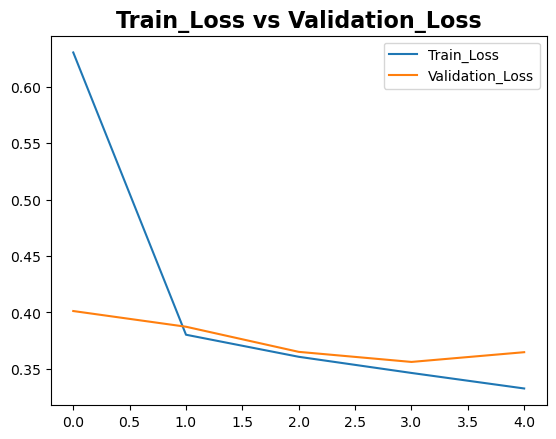

In [65]:
model_loss.plot()
plt.title('Train_Loss vs Validation_Loss', size=16, fontweight='bold')
plt.legend(['Train_Loss','Validation_Loss'],bbox_to_anchor=(1,1))

When we look at the graph, we can see that after one epoch, the loss function is a fraction smaller than the val_loss function. Based on the graph, we can see that the network is underfitting. Next, let us check how the model performed.

133/133 [==============================] - 40s 303ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3296
           1       0.77      0.60      0.68       949

    accuracy                           0.87      4245
   macro avg       0.83      0.78      0.80      4245
weighted avg       0.86      0.87      0.86      4245





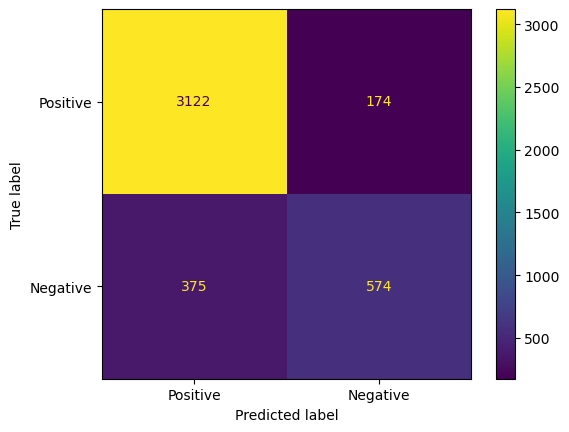

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred=text_model.predict(X_test_padded)
y_pred=np.argmax(y_pred, axis=1)
y_test_argmax=np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))
print('\n')
cm=confusion_matrix(y_test_argmax, y_pred)
CM=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Positive','Negative'])
CM.plot()

When we look at the classification report and confusion matrix, we can see that the model is actually performing well. We have achieved an overall macro F1 score of 0.80, and the individual scores are not bad either. As already pointed out, we are dealing with an imbalanced data set; therefore, it is also interesting to look at precision and recall.

#### Precision
Precision is the ratio between True Positives and all Positives. When we look at the positive class, the model is doing well by accomplishing a precision score of 0.89, and the negative class is doing well by achieving a score of 0.77.

#### Recall
Recall indicates how well our model identifies True Positives. The model performs very well in the positive class, achieving a score of 0.95. However, the score for the negative classes is 0.60, which is neither good nor bad.

Let's see how the model behaves when we apply under- and oversampling.

In [81]:
import joblib
joblib.dump(text_model,'simple_binary_model.pkl')

['simple_binary_model.pkl']

#### Neural Network with basic setting & undersampled data

In [67]:
#new model for undersampled data

text_model=Sequential()
#our model is able to process the needed amount of unique words in a dense vector size of 64
text_model.add(Embedding(vocab_size,64))

#input layer
text_model.add(Bidirectional(LSTM(128,return_sequences=True)))
#30% will be randomly excluded from each update cycle
text_model.add(Dropout(0.3))
#first hidden layer
##Bidirectional allows to process the input in both directions (forward and backwards)
text_model.add(Bidirectional(LSTM(128)))
text_model.add(Dropout(0.3))
##L1 & L2 regularization are there to add penalty terms to the loss function
text_model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01),
                     activity_regularizer=regularizers.l1(0.01)))
text_model.add(Dropout(0.3))

#output layer
text_model.add(Dense(y_train.shape[1], activation='sigmoid'))
##as optimizer we use Adam optimizer; as metric the macro F1 score
text_model.compile(loss='binary_crossentropy',optimizer=Adam(0.001),metrics=tf.keras.metrics.F1Score(average='macro'),run_eagerly=True)

print(text_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 64)          815104    
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 256)         197632    
 onal)                                                           
                                                                 
 dropout_21 (Dropout)        (None, None, 256)         0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [68]:
#with undersampling
early_stop=EarlyStopping(monitor='val_f1_score', mode='max', patience=2)
np.random.seed(101)
history=text_model.fit(X_train_resampled,y_train_resampled,epochs=15, validation_data=(X_val_padded,y_val),
                       batch_size=64,callbacks=early_stop)

Epoch 1/15
123/123 [==============================] - 123s 997ms/step - loss: 0.9226 - f1_score: 0.7007 - val_loss: 0.5937 - val_f1_score: 0.7480
Epoch 2/15
123/123 [==============================] - 121s 985ms/step - loss: 0.4829 - f1_score: 0.8336 - val_loss: 0.5832 - val_f1_score: 0.7106
Epoch 3/15
123/123 [==============================] - 124s 1s/step - loss: 0.4381 - f1_score: 0.8415 - val_loss: 0.4343 - val_f1_score: 0.7854
Epoch 4/15
123/123 [==============================] - 118s 959ms/step - loss: 0.4278 - f1_score: 0.8512 - val_loss: 0.4920 - val_f1_score: 0.7581
Epoch 5/15
123/123 [==============================] - 127s 1s/step - loss: 0.4009 - f1_score: 0.8596 - val_loss: 0.5060 - val_f1_score: 0.7613


In [69]:
#dataframe which showcases the loss and val_loss
model_loss=pd.DataFrame(history.history)
model_loss=model_loss[['loss','val_loss']]
model_loss

,loss,val_loss
0,0.922575,0.593664
1,0.482854,0.583215
2,0.438093,0.434334
3,0.427832,0.491991
4,0.400935,0.505953


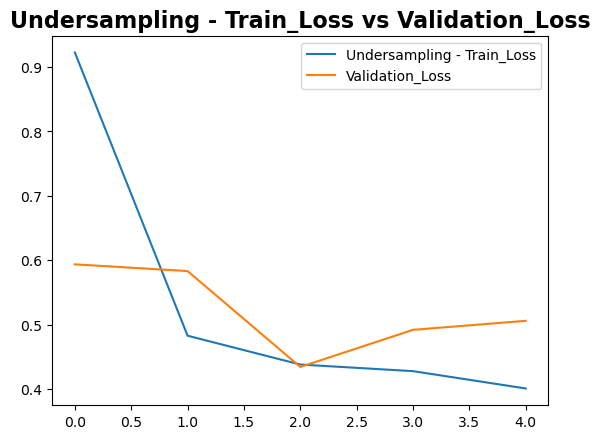

In [70]:
model_loss.plot()
plt.title('Undersampling - Train_Loss vs Validation_Loss', size=16, fontweight='bold')
plt.legend(['Undersampling - Train_Loss','Validation_Loss'],bbox_to_anchor=(1,1))

When we look at the graph, we can see more separation between loss and val_loss, but the model seems to underfit still.

133/133 [==============================] - 41s 311ms/step
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3296
           1       0.56      0.83      0.67       949

    accuracy                           0.82      4245
   macro avg       0.75      0.82      0.77      4245
weighted avg       0.86      0.82      0.83      4245





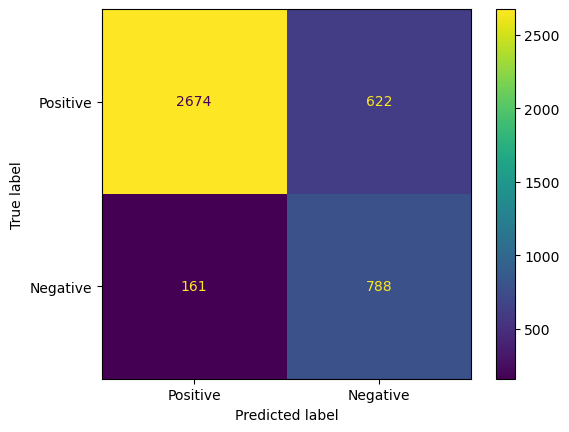

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred=text_model.predict(X_test_padded)
y_pred=np.argmax(y_pred, axis=1)
y_test_argmax=np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))
print('\n')
cm=confusion_matrix(y_test_argmax, y_pred)
CM=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Positive','Negative'])
CM.plot()

As we can see, the undersampling method did not give us the desired result. The model is performing worse, broken down by class and on every metric.

The oversampling may perform better than the undersampling approach, which we will do in the next step.

In [216]:
import joblib
joblib.dump(text_model,'simple_model_undersampling.pkl')

['simple_model_undersampling.pkl']

In [72]:
from imblearn.over_sampling import SMOTE

#setting up SMOTE
oversampler = SMOTE(random_state=101)

#resampling the training data and changing the data type so it can be process by the neural network
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_padded, y_train)
X_train_oversampled=tf.cast(X_train_oversampled, dtype=tf.float32)

#resampling & changing the dytpe to tf.float32, otherwise the network is not able to process the input
y_train_oversampled=to_categorical(y_train_oversampled)
y_train_oversampled=tf.cast(y_train_oversampled, dtype=tf.float32)

In [73]:
#new model for oversampled data

text_model=Sequential()
#our model is able to process the needed amount of unique words in a dense vector size of 64
text_model.add(Embedding(vocab_size,64))

#input layer
text_model.add(Bidirectional(LSTM(128,return_sequences=True)))
#30% will be randomly excluded from each update cycle
text_model.add(Dropout(0.3))
#first hidden layer
##Bidirectional allows to process the input in both directions (forward and backwards)
text_model.add(Bidirectional(LSTM(128)))
text_model.add(Dropout(0.3))
##L1 & L2 regularization are there to add penalty terms to the loss function
text_model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01),
                     activity_regularizer=regularizers.l1(0.01)))
text_model.add(Dropout(0.3))

#output layer
text_model.add(Dense(y_train.shape[1], activation='sigmoid'))
##as optimizer we use Adam optimizer; as metric the macro F1 score
text_model.compile(loss='binary_crossentropy',optimizer=Adam(0.001),metrics=tf.keras.metrics.F1Score(average='macro'),run_eagerly=True)

print(text_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          815104    
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 256)         197632    
 onal)                                                           
                                                                 
 dropout_24 (Dropout)        (None, None, 256)         0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 64)               

In [74]:
early_stop=EarlyStopping(monitor='val_f1_score', mode='max', patience=2)
np.random.seed(101)
history=text_model.fit(X_train_oversampled,y_train_oversampled,epochs=15, validation_data=(X_val_padded,y_val),
                       batch_size=64,callbacks=early_stop)

Epoch 1/15
409/409 [==============================] - 362s 886ms/step - loss: 0.7926 - f1_score: 0.4919 - val_loss: 0.6949 - val_f1_score: 0.1914
Epoch 2/15
409/409 [==============================] - 371s 908ms/step - loss: 0.6932 - f1_score: 0.4879 - val_loss: 0.6937 - val_f1_score: 0.1914
Epoch 3/15
409/409 [==============================] - 367s 898ms/step - loss: 0.6932 - f1_score: 0.3398 - val_loss: 0.6927 - val_f1_score: 0.4329
Epoch 4/15
409/409 [==============================] - 340s 832ms/step - loss: 0.6932 - f1_score: 0.4966 - val_loss: 0.6921 - val_f1_score: 0.4329
Epoch 5/15
409/409 [==============================] - 355s 868ms/step - loss: 0.6932 - f1_score: 0.4757 - val_loss: 0.6942 - val_f1_score: 0.1914


In [75]:
#dataframe which showcases the loss and val_loss
model_loss=pd.DataFrame(history.history)
model_loss=model_loss[['loss','val_loss']]
model_loss

,loss,val_loss
0,0.792628,0.694874
1,0.693168,0.693669
2,0.693175,0.692658
3,0.693169,0.692074
4,0.693161,0.694239


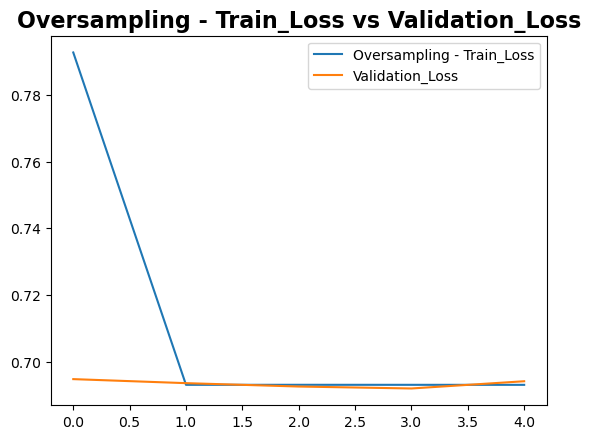

In [76]:
model_loss.plot()
plt.title('Oversampling - Train_Loss vs Validation_Loss', size=16, fontweight='bold')
plt.legend(['Oversampling - Train_Loss','Validation_Loss'],bbox_to_anchor=(1,1))

After using the oversampled data and looking at the graph we can see that the model is rather underfitting.

133/133 [==============================] - 32s 239ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3296
           1       0.22      1.00      0.37       949

    accuracy                           0.22      4245
   macro avg       0.11      0.50      0.18      4245
weighted avg       0.05      0.22      0.08      4245





C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gandj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


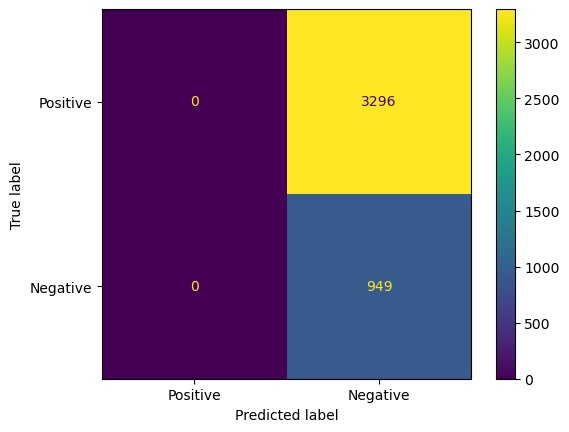

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred=text_model.predict(X_test_padded)
y_pred=np.argmax(y_pred, axis=1)
y_test_argmax=np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))
print('\n')
cm=confusion_matrix(y_test_argmax, y_pred)
CM=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Positive','Negative'])
CM.plot()

As we can see, the neural network with oversampled data performs horribly. All metrics are bad, and when we look at the confusion matrix, we can see the model can only predict every class as negative. For future studies, it might be interesting to fine-tune a model with oversampled data to see if oversampling is working on the data at all.

When comparing the basic, undersampling, and oversampling models, we conclude that the basic model performs the best. The basic model, which does not use any under- or oversampling method, has the best F1 macro score and also the best precision and recall score. Considering all metrics, the basic model performs the best, and we will not use any other sampling method for the upcoming approach.

I will perform hyperparameter tuning to ensure that we create the best-performing model. To be more specific, the hyperband approach will be used. Hyperband allows for adaptive resource allocation; it combines random search with early stopping to be more efficient in finding the best parameter for the neural network.

The parameter tuning will involve the following aspects:
- Number of LSTM & neuron layers
- Number of neurons
- Activation functions
- Dropout values
- regularization values
- Adam learning rate values

In [78]:
#!pip install keras_tuner
from kerastuner.tuners import Hyperband
import kerastuner as kt
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

#creating a def function which is looking for the best parameters
def build_model(hp):
    model = Sequential()
    model.add(Embedding(word_index + 1, hp.Int('embedding_units', min_value=32, max_value=256, step=32)))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    #adding a for loop which allows to add new LSTM layers to the model
    for x in range(hp.Int('LSTM_Layers',1,2)):
        model.add(Bidirectional(LSTM(hp.Int('LSTM_units_{}'.format(i), min_value=32, max_value=256, step=32),
                                     return_sequences=True)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Bidirectional(LSTM(hp.Int('LSTM_units_final', min_value=32, max_value=256, step=32))))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    #adding a for loop, which allows to add new Dense layers
    for d in range(hp.Int('Dense_layers',1,4)):
        model.add(Dense(hp.Int('dense_units_{}'.format(d), min_value=32, max_value=128, step=32),
                        activation=hp.Choice('dense_act_{}'.format(d),values=['relu','sigmoid','tanh','softplus','LeakyReLU'],default='relu'),
                    kernel_regularizer=regularizers.l2(hp.Choice('dense_l2_{}'.format(d), values=[0.1,0.01,0.001,0.0001])), activity_regularizer=regularizers.l1(hp.Choice('dense_l1_{}'.format(d), values=[0.1,0.01,0.001,0.0001]))))
        model.add(Dropout(hp.Float('dropout_3_{}'.format(d), min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dropout(hp.Float('dropout_4', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(hp.Choice('learning_rate', values=[0.1,0.01,0.001,0.0001])),
        metrics=[tf.keras.metrics.F1Score(average='macro')]
    )

    return model

#setting up the Hyperband for the model tuning
tuner = Hyperband(
    build_model,
    objective=kt.Objective("val_f1_score", direction="max"),
    max_epochs=15,  # Maximum number of epochs to train one model
    factor=2,  # Reduction factor for the number of models and epochs in each bracket
    directory='hyperband_loop_layers_bin',  # Directory to store the results
    project_name='text_model'  # Name of the project
)

#setting up the early stopping
early_stopping = EarlyStopping(
    monitor='val_f1_score',  # Metric to monitor
    mode='max',
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

#performing the parameter search
tuner.search(
    X_train_padded, y_train, epochs=15, validation_data=(X_val_padded,y_val),
    callbacks=[early_stopping]  # Add early stopping to the training process
)

#get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

#print the best model summary
best_model = tuner.hypermodel.build(best_hps)
print(best_model.summary())

#train the best model
np.random.seed(120)
history=best_model.fit(X_train_padded, y_train, epochs=15, validation_data=(X_val_padded,y_val),callbacks=[early_stopping])

Trial 46 Complete [00h 17m 49s]
val_f1_score: 0.8091326355934143

Best val_f1_score So Far: 0.8091326355934143
Total elapsed time: 06h 18m 22s
INFO:tensorflow:Oracle triggered exit
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 192)         2445312   
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 256)         328704    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 256)         394240    
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, None, 256)         394240    
 onal)                                                           
     

In [79]:
#dataframe which showcases the loss and val_loss 
model_loss=pd.DataFrame(history.history)
model_loss=model_loss[['loss','val_loss']]
model_loss

,loss,val_loss
0,0.626278,0.481648
1,0.449258,0.421026
2,0.398135,0.389071
3,0.368439,0.374326
4,0.354591,0.366978
5,0.342260,0.362745
6,0.335283,0.387520


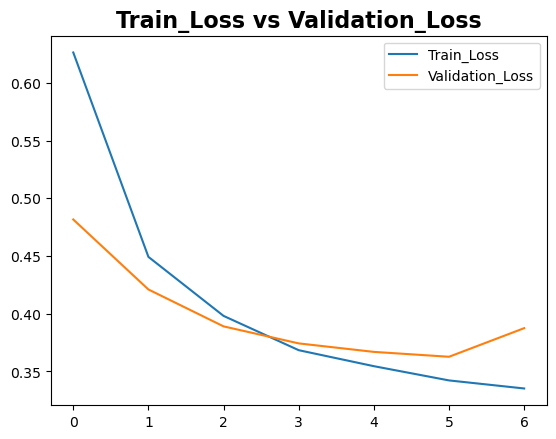

In [80]:
model_loss.plot()
plt.title('Train_Loss vs Validation_Loss', size=16, fontweight='bold')
plt.legend(['Train_Loss','Validation_Loss'],bbox_to_anchor=(1,1))

After parameter tuning, the model looks like a mix of under- and overfitting. At the beginning, it looks like it is underfitting, but then the val_loss starts again to increase, which indicates overfitting. Even though the model does not look perfect, when we compare the graphs, it is not bad at all. Next, we will evaluate the network with the classification report and confusion matrix.

133/133 [==============================] - 25s 170ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3296
           1       0.75      0.64      0.69       949

    accuracy                           0.87      4245
   macro avg       0.82      0.79      0.80      4245
weighted avg       0.87      0.87      0.87      4245





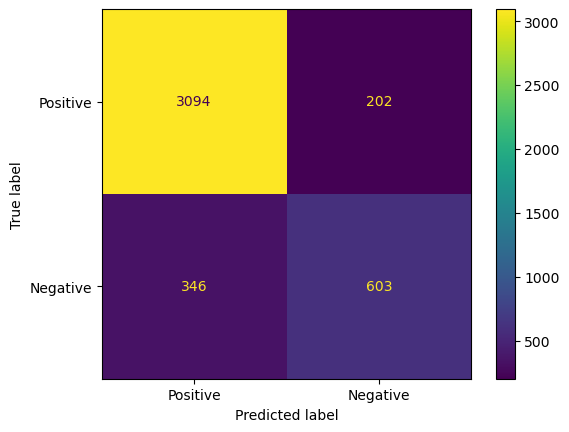

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred=best_model.predict(X_test_padded)
y_pred=np.argmax(y_pred, axis=1)
y_test_argmax=np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))
print('\n')
cm=confusion_matrix(y_test_argmax, y_pred)
CM=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive','Negative'])
CM.plot()

After parameter tuning, we accomplished the same F1 macro score as the basic model. Which model will we pick now?
To pick the best model, we need to focus on another metric; in our case, it will be the precision metric.

Why the precision metric? The precision metric measures how accurate the model is in predicting the right class to the right text/comment. This aspect is important for this project, and when we compare the tuned model with the basic model, we can see that the basic model performs better.

In [82]:
import joblib
joblib.dump(best_model,'final_model_binary.pkl')

['final_model_binary.pkl']

## Making Predictions with the Model

In [67]:
def sentiment_output(x):
    from collections import Counter
    import joblib

    best_model=joblib.load('simple_binary_model.pkl')
    #comment=df[df['Customer_Sentiment']=='Negative']['Review Text'][2]
    comment=x
    processed_text=data_comment(comment)
    encoded_sentence = tokenizer.texts_to_sequences([processed_text])

    # Pad the tokenized sequence to ensure it has the same length as the sequences used during training
    padded_sequence = pad_sequences(encoded_sentence)

    # Convert the padded sequence to a TensorFlow tensor
    input_tensor = tf.convert_to_tensor(padded_sequence)

    # Make predictions using the trained model
    predictions = best_model.predict(input_tensor)

    #Get the number of output units in the final layer of the model
    num_output_units = best_model.layers[-1].output_shape[-1]

    #Set binary_classification based on the number of output units
    binary_classification = (num_output_units == 1)

    #creating a dictionary with the fitting values
    class_labels = {
        0: 'Positive',
        1: 'Negative'
    }

    if binary_classification:
        sentiment_label = "Positive" if predictions[0] > 0.5 else "Negative"
    else:
        sentiment_label = class_labels[np.argmax(predictions)]

    # Print the predicted sentiment label
    print("Predicted sentiment label:", sentiment_label)

In [71]:
#'I bought the product because it looked nice online. However, after I received it, I realized that it looked terrible, and I did not like it.'
sentiment_output(input('Please enter the comment: '))

Please enter the comment: 'I bought the product because it looked nice online. However, after I received it, I realized that it looked terrible, and I did not like it.'
1/1 [==============================] - 0s 42ms/step
Predicted sentiment label: Negative


# Conclusion

In this project, we have accomplished to create a neural network, which allows us to predict the sentiment of comments correctly and allows the online shop to get a better idea how their products affect with their customers.